In [1]:
from astropy.io import fits
from specutils import Spectrum1D
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import requests
from io import BytesIO

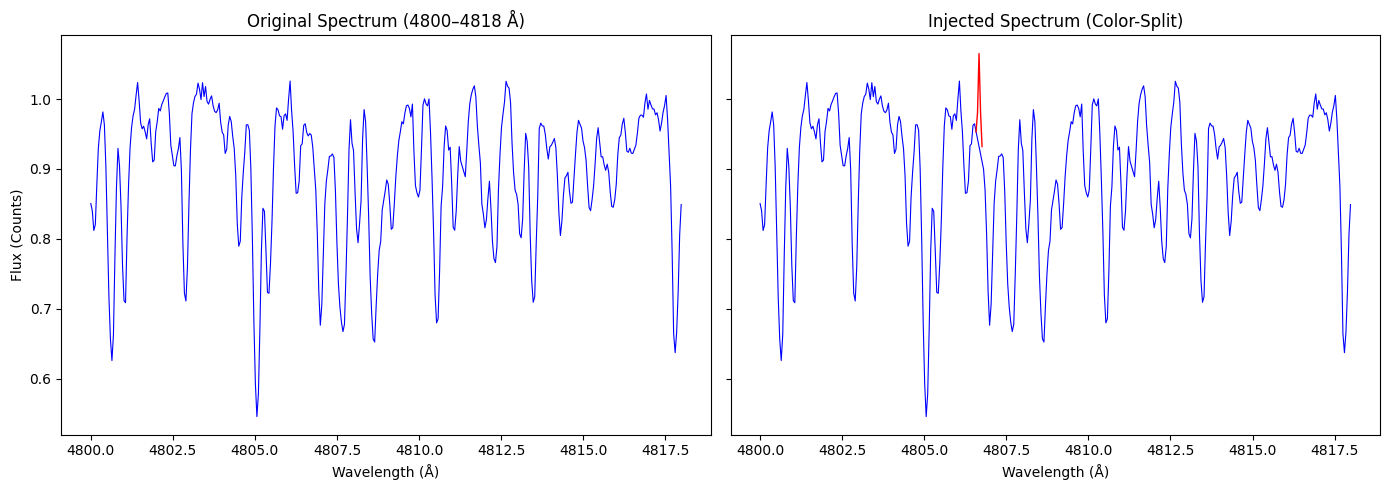

In [8]:

# === Download and open FITS ===
# url = "https://datacentral.org.au/vo/slink/links?ID=161116001701343&DR=galah_dr4&FILT=B&RESPONSEFORMAT=fits"
#spec = requests.get(url).content
hdul = fits.open('/home/emmay/BL2025/161116001701343.fits')

# === Read PRIMARY HDU ===
header = hdul[0].header
flux = hdul[0].data.astype(float)

# === Build wavelength axis ===
crval1 = header.get('CRVAL1')
cdelt1 = header.get('CDELT1')
crpix1 = header.get('CRPIX1', 1)

if crval1 is None or cdelt1 is None:
    raise ValueError("Missing CRVAL1 or CDELT1 in FITS header")

npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# === Inject Gaussian Peak ===
fwhm = 1.5  # pixels
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
center = npix // 2

x = np.arange(npix)
gaussian = np.exp(-0.5 * ((x - center) / sigma) ** 2)
gaussian *= 0.1 * np.nanmax(flux)  # scale to 10% of max flux

flux_injected = flux + gaussian

# === Define zoomed wavelength window ===
wl_start = 4800  # Å
wl_end = 4818    # Å

mask = (wavelength.value >= wl_start) & (wavelength.value <= wl_end)
wave_zoom = wavelength[mask]
flux_orig_zoom = flux[mask]
flux_inj_zoom = flux_injected[mask]
gaussian_zoom = gaussian[mask]

# === Determine color regions ===
threshold = 0.001 * np.max(gaussian)  # 5% threshold
color_mask = gaussian_zoom >= threshold

# === Plot ===
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# --- Left: Original spectrum ---
axs[0].plot(wave_zoom, flux_orig_zoom, color='blue', linewidth=0.8)
axs[0].set_title("Original Spectrum (4800–4818 Å)")
axs[0].set_xlabel("Wavelength (Å)")
axs[0].set_ylabel("Flux (Counts)")

# --- Right: Injected spectrum with color split ---
# Blue part (below threshold)
axs[1].plot(wave_zoom[~color_mask], flux_inj_zoom[~color_mask], color='blue', linewidth=0.8)

# Red part (where Gaussian >= 5%)
axs[1].plot(wave_zoom[color_mask], flux_inj_zoom[color_mask], color='red', linewidth=1.0)

axs[1].set_title("Injected Spectrum (Color-Split)")
axs[1].set_xlabel("Wavelength (Å)")

plt.tight_layout()
plt.show()


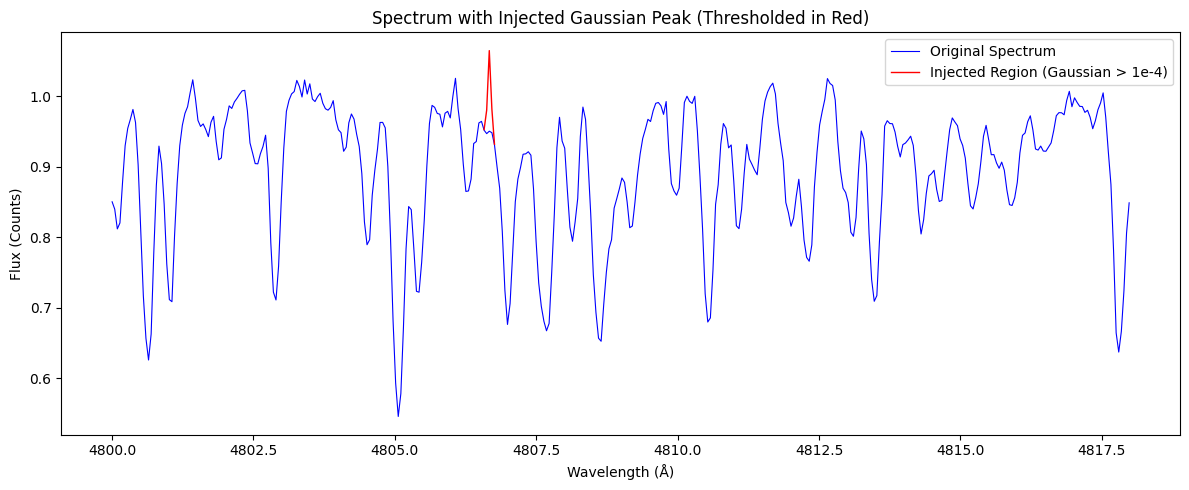

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u

# === Open FITS file from local path ===
hdul = fits.open('/home/emmay/BL2025/161116001701343.fits')

# === Read PRIMARY HDU ===
header = hdul[0].header
flux = hdul[0].data.astype(float)

# === Build wavelength axis ===
crval1 = header.get('CRVAL1')
cdelt1 = header.get('CDELT1')
crpix1 = header.get('CRPIX1', 1)

if crval1 is None or cdelt1 is None:
    raise ValueError("Missing CRVAL1 or CDELT1 in FITS header")

npix = len(flux)
wavelength = (crval1 + (np.arange(npix) + 1 - crpix1) * cdelt1) * u.AA

# === Inject Gaussian Peak ===
fwhm = 1.5  # pixels
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
center = npix // 2

x = np.arange(npix)
gaussian = np.exp(-0.5 * ((x - center) / sigma) ** 2)
gaussian *= 0.1 * np.nanmax(flux)  # scale to 10% of max flux

flux_injected = flux + gaussian

# === Define zoomed wavelength window ===
wl_start = 4800  # Å
wl_end = 4818    # Å

mask = (wavelength.value >= wl_start) & (wavelength.value <= wl_end)
wave_zoom = wavelength[mask]
flux_orig_zoom = flux[mask]
flux_inj_zoom = flux_injected[mask]
gaussian_zoom = gaussian[mask]

# === Mask for where Gaussian > 1e-4 ===
threshold_mask = gaussian_zoom > 1e-4

# === Plot ===
plt.figure(figsize=(12, 5))

# Plot original spectrum (blue, full)
plt.plot(wave_zoom, flux_orig_zoom, color='blue', linewidth=0.8, label="Original Spectrum")

# Plot injected spectrum only where Gaussian > 1e-4 (red)
plt.plot(wave_zoom[threshold_mask], flux_inj_zoom[threshold_mask],
         color='red', linewidth=1.0, label="Injected Region (Gaussian > 1e-4)")

plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (Counts)")
plt.title("Spectrum with Injected Gaussian Peak (Thresholded in Red)")
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
hdul.info()

Filename: /home/emmay/BL2025/161116001701343.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      36   (4096,)   float64   
